<ipython-input-2-41e8ba5019e9>:13: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(include=[np.object])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


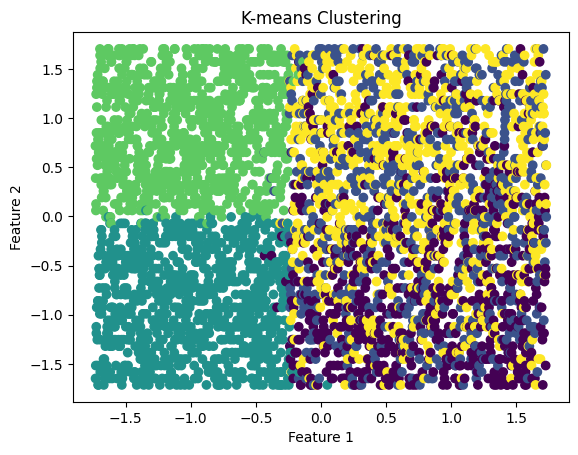

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('/content/shopping_trends.csv')

# Separate numerical and categorical features
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[np.object])

# Preprocess numerical features
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(numeric_features)

# Preprocess categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_features = encoder.fit_transform(categorical_features)

# Concatenate processed features
processed_data = np.concatenate((scaled_numeric_features, encoded_categorical_features), axis=1)

# Choose the number of clusters (K)
k = 5

# Apply K-means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(processed_data)

# Assign clusters to the data points
clusters = kmeans.predict(processed_data)

# Visualize the clusters (for 2D data)
# Note: You may need to reduce dimensionality using techniques like PCA for visualization if you have many features
plt.scatter(processed_data[:, 0], processed_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

# Interpret results
# Analyze the characteristics of each cluster and their purchase behavior
